# [Keras with TensorFlow Course - Python Deep Learning and Neural Networks for Beginners Tutorial](https://www.youtube.com/watch?v=qFJeN9V1ZsI)



## Data Preparation and Processing

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_labels = []
train_samples = []

Example data:

    - An experimental drug was tested on indivduals from ages 13 to 100 in a clinical trial
    - The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
    - Aroung 95% of patients 65 or older experienced side efffects.
    - Around 95% of patients under 65 experienced no side effects.

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of olfer individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [4]:
for i in train_samples[:10]:
    print(i)

19
84
47
79
47
66
59
66
63
72


In [5]:
for i in train_labels[:10]:
    print(i)

1
0
1
0
1
0
1
0
1
0


## Passing Sample Arrays to NP Arrays

In [6]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples) 
#Shuffle arrays or sparse matrices in a consistent way.

In [7]:
scaler = MinMaxScaler(feature_range=(0,1)) #Normalize / Standardize the data
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1)) #does not accept 1d data need to reshape it


In [8]:
for i in scaled_train_samples[:10]:
    print(i)

[0.1954023]
[0.89655172]
[0.12643678]
[0.33333333]
[0.64367816]
[0.8045977]
[0.87356322]
[0.74712644]
[0.29885057]
[0.93103448]


## Simple tf.keras Sequential Model

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [10]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num GPUs available:  1


In [11]:
model = Sequential([
    Dense(units = 16, input_shape=(1,), activation='relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

Metal device set to: Apple M1


2022-07-04 16:05:22.617190: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-04 16:05:22.617273: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


## Train Sequential Model

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size = 10, epochs = 30, shuffle = True, verbose = 2)
#x input data
#y target data
# validation split how much to hold out the training set; split occurs before shuffle last x% and will not be shuffled,
# so shuffle prior to fitting
# batch size how many samples included in one batch
# epochs the model will process 30 times before completing
# shuffle reordering dataset Tue by default; important for cross validation
# Verbose sees output


Epoch 1/30


2022-07-04 16:05:25.120203: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-04 16:05:25.267139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


189/189 - 1s - loss: 0.6794 - accuracy: 0.5381 - val_loss: 0.6668 - val_accuracy: 0.5619 - 951ms/epoch - 5ms/step
Epoch 2/30


2022-07-04 16:05:25.999366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


189/189 - 1s - loss: 0.6489 - accuracy: 0.6370 - val_loss: 0.6340 - val_accuracy: 0.7095 - 638ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.6117 - accuracy: 0.7397 - val_loss: 0.5982 - val_accuracy: 0.7476 - 644ms/epoch - 3ms/step
Epoch 4/30
189/189 - 1s - loss: 0.5777 - accuracy: 0.7667 - val_loss: 0.5656 - val_accuracy: 0.7857 - 632ms/epoch - 3ms/step
Epoch 5/30
189/189 - 1s - loss: 0.5431 - accuracy: 0.8138 - val_loss: 0.5313 - val_accuracy: 0.8143 - 633ms/epoch - 3ms/step
Epoch 6/30
189/189 - 1s - loss: 0.5098 - accuracy: 0.8386 - val_loss: 0.5009 - val_accuracy: 0.8190 - 624ms/epoch - 3ms/step
Epoch 7/30
189/189 - 1s - loss: 0.4786 - accuracy: 0.8556 - val_loss: 0.4729 - val_accuracy: 0.8476 - 617ms/epoch - 3ms/step
Epoch 8/30
189/189 - 1s - loss: 0.4493 - accuracy: 0.8735 - val_loss: 0.4460 - val_accuracy: 0.8667 - 615ms/epoch - 3ms/step
Epoch 9/30
189/189 - 1s - loss: 0.4220 - accuracy: 0.8836 - val_loss: 0.4230 - val_accuracy: 0.8714 - 618ms/epoch - 3ms/step
Epoch 10/30

## Validation Set
- helps with the overfitting problems


## Test Set

In [15]:
test_labels = []
test_samples = []

In [16]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of olfer individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [17]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [18]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

## Predict

In [19]:
predictions = model.predict(x = scaled_test_samples, batch_size = 10, verbose = 0)

2022-07-04 16:05:44.509321: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [20]:
for i in predictions:
    print(i)

[0.05677244 0.94322765]
[0.06104201 0.93895805]
[0.04402409 0.9559759 ]
[0.9673312  0.03266879]
[0.6085025 0.3914975]
[0.8057307 0.1942693]
[0.03407009 0.96593   ]
[0.57464063 0.42535937]
[0.06747693 0.9325231 ]
[0.8267428  0.17325722]
[0.06747693 0.9325231 ]
[0.33611125 0.6638888 ]
[0.01898961 0.9810104 ]
[0.96816975 0.03183027]
[0.9058322  0.09416784]
[0.06747693 0.9325231 ]
[0.1594729 0.8405272]
[0.9711881 0.0288119]
[0.9713659  0.02863409]
[0.84591675 0.15408328]
[0.14156319 0.8584369 ]
[0.02027224 0.97972775]
[0.30557588 0.69442415]
[0.97041816 0.02958187]
[0.7314259  0.26857412]
[0.02309701 0.97690296]
[0.7314259  0.26857412]
[0.27665865 0.7233414 ]
[0.02027224 0.97972775]
[0.20073105 0.79926896]
[0.9709944  0.02900557]
[0.50509644 0.49490362]
[0.9684305  0.03156945]
[0.02994448 0.9700556 ]
[0.9567736  0.04322644]
[0.96090627 0.03909368]
[0.24949488 0.7505052 ]
[0.0263048 0.9736952]
[0.93467677 0.0653233 ]
[0.8931725  0.10682756]
[0.05677244 0.94322765]
[0.20073105 0.79926896]
[0

In [21]:
rounded_predictions = np.argmax(predictions, axis = -1)

In [22]:
for i in rounded_predictions:
    print(i)

1
1
1
0
0
0
1
0
1
0
1
1
1
0
0
1
1
0
0
0
1
1
1
0
0
1
0
1
1
1
0
0
0
1
0
0
1
1
0
0
1
1
1
1
1
0
1
0
0
1
0
0
0
0
0
1
0
1
1
1
1
0
1
0
1
1
0
0
1
0
1
1
0
0
1
1
0
1
0
0
1
0
1
1
0
0
1
1
0
0
1
1
0
0
0
1
0
0
0
1
0
1
0
1
0
1
0
1
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
1
0
1
1
1
0
0
1
1
1
0
1
1
0
1
0
0
0
0
1
1
1
1
1
1
1
0
0
1
1
1
1
0
0
0
1
1
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
1
0
0
1
1
0
0
0
0
0
0
1
0
1
1
0
1
1
0
0
1
0
0
0
1
0
1
0
1
0
0
1
1
1
1
1
0
0
0
1
1
1
1
1
1
1
0
1
0
1
1
1
0
0
1
0
1
1
0
1
1
1
0
0
0
0
1
1
0
0
1
0
1
0
0
1
1
0
0
0
0
1
0
0
1
0
0
1
0
1
0
0
1
0
1
1
1
0
1
1
0
0
1
0
1
1
1
1
1
0
1
1
1
1
1
0
0
1
0
1
0
1
1
0
0
0
1
0
1
1
1
1
0
1
1
0
1
0
1
0
1
1
0
1
1
1
1
0
0
0
1
0
0
1
0
1
0
1
0
0
1
0
0
0
1
0
0
0
1
1
1
1
0
1
1
0
1
1
1
0
1
1
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
1
1
0
1
1
1
1
0
1
0
0
0
1
0
1
1
0
1
1
0
1
0
1
1
0
0
0
0
0
0
0
1
1
1
1
1
1
1
0
0
1
0
0
1
0


In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [42]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`
    """
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)
    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                horizantalalignment = "center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [55]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[195  15]
 [ 10 200]]


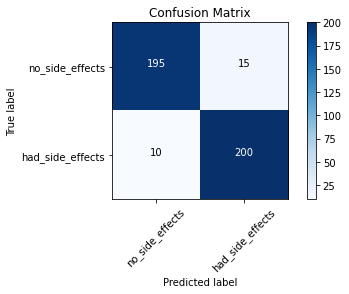

In [56]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Save and Load a Model



In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 1. model.save()

In [60]:
# Checks first to see if file exists already
# If not, the model is saved to disk

import os.path
if os.path.isfile('models/medical_trial_model.h5') is False:
    model.save('models/medical_trial_model.h5')

This save function saves:
- The architecture of the model, allowing to re-create the model
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.

In [61]:
from tensorflow.keras.models import load_model
new_model = load_model('models/medical_trial_model.h5')

In [62]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [63]:
new_model.get_weights()

[array([[-0.33263588, -0.32478538,  0.76940423,  0.6511109 , -0.27277482,
         -0.09364504,  0.34159222,  0.4423612 ,  0.19041546, -0.2545808 ,
          0.59216714, -0.33818114,  0.2447923 , -0.16195133,  0.00367764,
         -0.4809308 ]], dtype=float32),
 array([ 0.        ,  0.        ,  0.13079758, -0.12821506,  0.        ,
         0.        , -0.11502253, -0.12449738, -0.07025879,  0.        ,
        -0.1615079 ,  0.        ,  0.18234949,  0.        , -0.00424028,
         0.        ], dtype=float32),
 array([[-0.13308246,  0.2307581 ,  0.13077629, -0.34880933,  0.20328978,
         -0.07732135, -0.14663234,  0.34801623,  0.32392862,  0.03976285,
         -0.2371191 , -0.25847787, -0.26000416,  0.02461427,  0.05013511,
          0.00686252, -0.0123578 , -0.24338236, -0.0916957 , -0.00558141,
          0.04738748, -0.20668124, -0.22469108,  0.35273126, -0.09227327,
         -0.08536297,  0.19255343,  0.12877649, -0.07118562,  0.20086876,
          0.12643176,  0.16543397],
 

In [64]:
new_model.optimizer

### 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [65]:
# save as JSON
json_string = model.to_json()

#save as YAML
#YAML_string = model.to_yaml()

In [66]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [67]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

In [68]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


### 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [69]:
# Checks first to see if file exists already
# If not, the weights are saved to disk

import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save('models/my_model_weights.h5')

In [70]:
model2 = Sequential([
    Dense(units = 16, input_shape=(1,), activation='relu'),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [71]:
model2.load_weights('models/my_model_weights.h5')

In [72]:
model2.get_weights()

[array([[-0.33263588, -0.32478538,  0.76940423,  0.6511109 , -0.27277482,
         -0.09364504,  0.34159222,  0.4423612 ,  0.19041546, -0.2545808 ,
          0.59216714, -0.33818114,  0.2447923 , -0.16195133,  0.00367764,
         -0.4809308 ]], dtype=float32),
 array([ 0.        ,  0.        ,  0.13079758, -0.12821506,  0.        ,
         0.        , -0.11502253, -0.12449738, -0.07025879,  0.        ,
        -0.1615079 ,  0.        ,  0.18234949,  0.        , -0.00424028,
         0.        ], dtype=float32),
 array([[-0.13308246,  0.2307581 ,  0.13077629, -0.34880933,  0.20328978,
         -0.07732135, -0.14663234,  0.34801623,  0.32392862,  0.03976285,
         -0.2371191 , -0.25847787, -0.26000416,  0.02461427,  0.05013511,
          0.00686252, -0.0123578 , -0.24338236, -0.0916957 , -0.00558141,
          0.04738748, -0.20668124, -0.22469108,  0.35273126, -0.09227327,
         -0.08536297,  0.19255343,  0.12877649, -0.07118562,  0.20086876,
          0.12643176,  0.16543397],
 

# Convolutional Neural Networks